<a href="https://colab.research.google.com/github/HarshalaShisave/mydatascience2021/blob/main/Assign7_clustering_CrimeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [ ]:
crime=pd.read_csv('/content/crime_data.csv')
crime

In [ ]:
crime.info()

In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

In [6]:
# Normalize heterogenous numerical data using z-score (x-mean/std) or custom defined function 
# Normalization function - here custom defined
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
crime_norm = norm_func(crime)
crime_norm

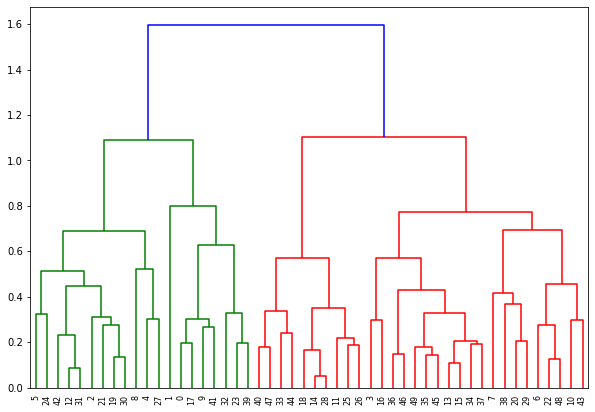

In [8]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(crime_norm,'complete'))

In [9]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [11]:
y=pd.DataFrame(hclusters.fit_predict(crime_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    13
2    12
4     9
1     9
3     7
Name: clustersid, dtype: int64

In [12]:
# Adding clusters to dataset
crime['clustersid']=hclusters.labels_
crime

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,4
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,3


In [13]:
crime.groupby('clustersid').agg(['mean']).reset_index()


,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308
1,1,4.644444,144.444444,79.222222,18.766667
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714
4,4,7.466667,135.666667,63.444444,18.600000


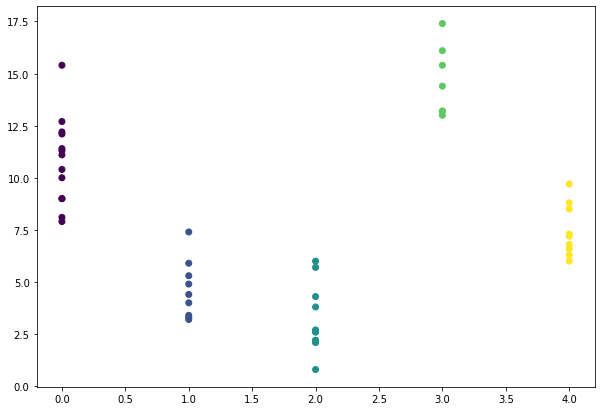

In [14]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clustersid'],crime['Murder'], c=hclusters.labels_) 